<h1 style="background-color: rgba(255, 255, 0, 0.5)">SECTION 0</h1>

*In this section we import libraries and packages useful for the analysis*

In [1]:
# import packages

import pandas as pd # data analysis library

import numpy as np # scientific library

import requests # http library

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import geopandas as gpd # working with spatial data library

import shapely # geometric library

from sklearn.cluster import KMeans # machine learning library for k-means algorithm

import matplotlib.cm as cm

import matplotlib.colors as colors

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # machine learning library for linear regression model

<h1 style="background-color: rgba(255, 0, 0, 0.5)">SECTION 1</h1>

*In this section we'll get the geo data for the metropolitan city of Milan and its neighbourhods. 
Milano neighbourhoods are named "NIL" which is an acronym for "local identity nuclei". Data on NIL are available as geojson files from governative platforms and are free. For each NIL is neeeded its latitude and longitude inn order to plot it using Folium library. Useful datasets about metropolitan city of Milan can be found at the following <a href="https://dati.comune.milano.it/dataset" target="_blank">LINK</a>.*

In [2]:
# coordinates of Milano using geopy library

address = 'Milano, Italy'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Milan are lat:{}, lng:{}.'.format(latitude, longitude))


The coordinates of Milan are lat:45.4668, lng:9.1905.


In [3]:
# read geojson file of Milan areas using geopandas library

gdf = gpd.read_file("https://dati.comune.milano.it/dataset/e8e765fc-d882-40b8-95d8-16ff3d39eb7c/resource/9c4e0776-56fc-4f3d-8a90-f4992a3be426/download/ds964_nil_wm.geojson")
gdf.head()
    

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Length,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15274 45.43887, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10591 45.49084, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15495 45.48852, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16763 45.52272, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20028 45.52846, ..."


*Datasets fields must be interpreted as follows:*
1. `ID_NIL` : stands for "Nuclei di identità locali", which represents neighbourhoods of Milan
2. `NIL` : name desciption of the neighbourhood
3. `Valido_dal` : indicates the sarting validity date of the data
4. `Valido_al` : indicates if the neighbourhood is still valid nowadays
5. `Fonte` : indicates if the neighbourhoods data are approved
6. `Shape_Length` : linear extension of the neighbourhood
7. `Shape_Area` : area extension of the neighbourhood 
8. `OBJECTID` : unique id
9. `geometry` : spatial coordinates of the boundaries of the neigbourhood

In [4]:
# calculate the centroid for each neighbourhood using shapely library

lng = []
lat = []
for i in range (len(gdf)):
    lng.append(gdf["geometry"][i].centroid.x)
    lat.append(gdf["geometry"][i].centroid.y)        
gdf["lng"] = np.array(lng).T
gdf["lat"] = np.array(lat).T
gdf.head()


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Length,Shape_Area,OBJECTID,geometry,lng,lat
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15274 45.43887, ...",9.137260,45.438460
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10591 45.49084, ...",9.101675,45.492822
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15495 45.48852, ...",9.153947,45.484490
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16763 45.52272, ...",9.156731,45.517433
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20028 45.52846, ...",9.184235,45.523514


In [5]:
# convert the geo dataframe to a pandas dataframe

df = pd.DataFrame(gdf)
df.head()


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Length,Shape_Area,OBJECTID,geometry,lng,lat
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15274 45.43887, ...",9.137260,45.438460
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10591 45.49084, ...",9.101675,45.492822
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15495 45.48852, ...",9.153947,45.484490
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16763 45.52272, ...",9.156731,45.517433
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20028 45.52846, ...",9.184235,45.523514


In [6]:
# dataframe cleaning

df = df.rename(columns={'ID_NIL': 'id_nil', 
                   'NIL': 'nil_name',
                   'Valido_dal': 'valido_dal',
                   'Valido_al': 'valido_al',
                   'Fonte': 'fonte',
                   'Shape_Length': 'shape_length',
                   'Shape_Area': 'shape_area',
                   'OBJECTID': 'object_id',                 
                })
df = df.drop(columns=["valido_dal", "valido_al", "fonte", "geometry", "shape_length", "shape_area", "object_id"])
df


,id_nil,nil_name,lng,lat
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460
1,64,TRENNO,9.101675,45.492822
2,67,PORTELLO,9.153947,45.484490
3,81,BOVISASCA,9.156731,45.517433
4,84,PARCO NORD,9.184235,45.523514
...,...,...,...,...
83,68,PAGANO,9.162856,45.473535
84,2,BRERA,9.188157,45.474252
85,33,ROGOREDO - SANTA GIULIA,9.243522,45.436672
86,17,ADRIANO,9.248356,45.514093


*Datasets filtered fields that will be relevant for our anylisis are:*
1. `id_nil` : stands for "Nuclei di identità locali", which represents neighbourhoods of Milan
2. `nil_name` : name desciption of the nil (neighbourhood)
3. `lng` : calculated longitude for the nil (neighbourhood)
4. `lat` : calculated latitude for the nil (neighbourhood)

In [7]:
# creating the map of Milano using folium library

map_milano = folium.Map(location=[latitude, longitude], zoom_start=11)


# adding markers to map

for latitude, longitude, id_nil, nil_name in zip(df['lat'], df['lng'], df["id_nil"], df["nil_name"]):
    label = 'ID: {} DESCRIPTION: {}'.format(id_nil, nil_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True
        ).add_to(map_milano)  
map_milano


<h1 style="background-color: rgba(0, 255, 0, 0.5)">SECTION 2</h1>

*In this section we'll use the Fursquare API to get relevant venues around each NIL (neighbourhood) of Milan. 
Foursquare website is available at this <a href="https://foursquare.com/" target="_blank">LINK</a>.*

In [8]:
# foursquare API credentials

CLIENT_ID = '5EO53PZBCQ31LKZMSVR5TCRADLTVYWAZIUYMHA1ZOYEGCBE0' 
CLIENT_SECRET = 'C2TL5IQE1VPEKDB5HTZNOBX1PRFJBSTT1XLCAOND2GOTYBM0'
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 5EO53PZBCQ31LKZMSVR5TCRADLTVYWAZIUYMHA1ZOYEGCBE0
CLIENT_SECRET:C2TL5IQE1VPEKDB5HTZNOBX1PRFJBSTT1XLCAOND2GOTYBM0


In [9]:
# create a function to get all the venue categories in Milan

LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['NIL Description', 
                  'NIL Latitude', 
                  'NIL Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)


In [10]:
# collect venues in Milan for each Neighbourhood

venues_in_milano = getNearbyVenues(df['nil_name'], df['lat'], df['lng'])


RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
TRENNO
PORTELLO
BOVISASCA
PARCO NORD
FIGINO
LORETO - CASORETTO - NOLO
QUARTO OGGIARO - VIALBA - MUSOCCO
ISOLA
QUARTO CAGNINO
STADIO - IPPODROMI
QUINTO ROMANO
DUOMO
GUASTALLA
SAN SIRO
COMASINA
TIBALDI
GRECO - SEGNANO
DE ANGELI - MONTE ROSA
FARINI
BRUZZANO
QT 8
STEPHENSON
CANTALUPA
QUINTOSOLE
PARCO SEMPIONE
BARONA
VILLAPIZZONE - CAGNOLA - BOLDINASCO
PARCO BOSCO IN CITTA'
GORLA - PRECOTTO
NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI
TRIULZO SUPERIORE
PTA ROMANA
TALIEDO - MORSENCHIO - Q.RE FORLANINI
PORTA TICINESE - CONCA DEL NAVIGLIO
TRE TORRI
ASSIANO
MORIVIONE
VIGENTINO - Q.RE FATIMA
BICOCCA
ORTOMERCATO
LODI - CORVETTO
MUGGIANO
PORTA TICINESE - CONCHETTA
UMBRIA - MOLISE - CALVAIRATE
ROSERIO
RONCHETTO DELLE RANE
Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO
MONLUE' - PONTE LAMBRO
PADOVA - TURRO - CRESCENZAGO
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
PORTA MAGENTA
FORZE ARMATE
GHISOLFA
CHIARAVALLE
PARCO DELLE ABBAZIE
MACI

In [11]:
# venues in Milan dataframe

venues_in_milano.head()


,NIL Description,NIL Latitude,NIL Longitude,Venue,Venue Category
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,Ristorante il Coriandolo,Italian Restaurant
1,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,Simply Market,Supermarket
2,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,Pizzeria Bis,Pizza Place
3,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,FE Fabbrica Esperienza,Theater
4,TRENNO,45.492822,9.101675,La Ratera,Pub


In [12]:
# venues in Milan dataframe shape

venues_in_milano.shape


(1492, 5)

In [13]:
# encode venues categories for succesfully applying machine learning clustering model

milano_venue_cat = pd.get_dummies(venues_in_milano[['Venue Category']], prefix="", prefix_sep="")
milano_venue_cat

# add the name of neighbourhood to the one encoded dataframe

milano_venue_cat['NIL Description'] = venues_in_milano['NIL Description'] 

# moving neighborhood column to the first column 

fixed_columns = [milano_venue_cat.columns[-1]] + list(milano_venue_cat.columns[:-1])
milano_venue_cat = milano_venue_cat[fixed_columns]
milano_venue_cat.head()


,NIL Description,Adult Education Center,Airport,Airport Terminal,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Tunnel,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRENNO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# group the NIL (or neighbourhoods), calculate the mean venue categories for each NIL

milano_grouped = milano_venue_cat.groupby('NIL Description').mean().reset_index()
milano_grouped.head()


,NIL Description,Adult Education Center,Airport,Airport Terminal,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Tunnel,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop
0,ADRIANO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFFORI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BANDE NERE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BARONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# function to return the most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]


In [16]:
# since there are too many venues categories we take only the top 10 to cluster the Neighbourhoods

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['NIL Description']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe

nil_venues_sorted = pd.DataFrame(columns=columns)
nil_venues_sorted['NIL Description'] = milano_grouped['NIL Description']

for ind in np.arange(milano_grouped.shape[0]):
    nil_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milano_grouped.iloc[ind, :], num_top_venues)

nil_venues_sorted.head()


,NIL Description,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,Clothing Store,Trattoria/Osteria,Sporting Goods Shop,Café,Supermarket,Park,Electronics Store,Toy / Game Store,Pharmacy,Soccer Field
1,AFFORI,Pizza Place,Park,Fried Chicken Joint,Hotel,Supermarket,Health Food Store,Café,Restaurant,Pool Hall,Italian Restaurant
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,Italian Restaurant,Bar,Soccer Field,Café,Park,Pizza Place,Fast Food Restaurant,Fountain,Football Stadium,Food Truck
3,BANDE NERE,Japanese Restaurant,Restaurant,Pizza Place,Italian Restaurant,Food Court,Diner,Plaza,Cupcake Shop,Cosmetics Shop,Pharmacy
4,BARONA,Soccer Field,Food Court,Athletics & Sports,Tennis Stadium,Wine Shop,Fish & Chips Shop,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Football Stadium


*Dataset obtained defines most commun venues types for each of Milan NIL (neighbourhood)*

<h1 style="background-color: rgba(0, 0, 255, 0.5)">SECTION 3</h1>

*In this section we'll use scikit learn machine learning library, to run a k-means clustering algorithm.
the aim of the clustering is grouping NIL (neighbourhoods) of Milan by most commun venues that are available inside the boundaries of the NIL*

In [17]:
# set number of clusters for k-means algorithm

k_num_clusters = 5


In [18]:
# run k-means clustering

milano_grouped_clustering = milano_grouped.drop('NIL Description', 1)
kmeans = KMeans(n_clusters=k_num_clusters, random_state=0).fit(milano_grouped_clustering)
kmeans


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
# add the clustering Label column to the top 10 common venue categories

nil_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [20]:
# merge "df" (see PART 1) with "nil_venues_sorted" to add latitude/longitude for each NIL (or neighbourhood)

milano_merged = df
milano_merged = milano_merged.join(nil_venues_sorted.set_index('NIL Description'), on='nil_name')
milano_merged.head()


,id_nil,nil_name,lng,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460,3.0,Theater,Supermarket,Italian Restaurant,Pizza Place,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Wine Shop
1,64,TRENNO,9.101675,45.492822,0.0,Pizza Place,Adult Education Center,Pub,Sandwich Place,Soccer Field,Ice Cream Shop,Plaza,Park,Bakery,Flower Shop
2,67,PORTELLO,9.153947,45.484490,3.0,Italian Restaurant,Café,Japanese Restaurant,Hotel,Bar,Pub,Pizza Place,Restaurant,Pastry Shop,Clothing Store
3,81,BOVISASCA,9.156731,45.517433,3.0,Soccer Field,Shopping Plaza,Park,Supermarket,Restaurant,Art Gallery,Gym / Fitness Center,Bus Stop,Italian Restaurant,Food Court
4,84,PARCO NORD,9.184235,45.523514,2.0,Football Stadium,Playground,Wine Shop,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Food Truck,Food Court,Food & Drink Shop


In [21]:
# drop all the NaN values to prevent data skew

milano_data_nonan = milano_merged.dropna(subset=['Cluster Labels'])
milano_data_nonan.head()


,id_nil,nil_name,lng,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460,3.0,Theater,Supermarket,Italian Restaurant,Pizza Place,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Wine Shop
1,64,TRENNO,9.101675,45.492822,0.0,Pizza Place,Adult Education Center,Pub,Sandwich Place,Soccer Field,Ice Cream Shop,Plaza,Park,Bakery,Flower Shop
2,67,PORTELLO,9.153947,45.484490,3.0,Italian Restaurant,Café,Japanese Restaurant,Hotel,Bar,Pub,Pizza Place,Restaurant,Pastry Shop,Clothing Store
3,81,BOVISASCA,9.156731,45.517433,3.0,Soccer Field,Shopping Plaza,Park,Supermarket,Restaurant,Art Gallery,Gym / Fitness Center,Bus Stop,Italian Restaurant,Food Court
4,84,PARCO NORD,9.184235,45.523514,2.0,Football Stadium,Playground,Wine Shop,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Food Truck,Food Court,Food & Drink Shop


In [22]:
# plot the clusters

map_clusters_milano = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters

x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for latitude, longitude, cluster in zip(milano_data_nonan['lat'], milano_data_nonan['lng'], milano_data_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1), parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.8
        ).add_to(map_clusters_milano)
        
map_clusters_milano


In [23]:
# examine cluster 1

milano_data_nonan.loc[milano_data_nonan['Cluster Labels'] == 0, milano_data_nonan.columns[[1] + list(range(5, milano_data_nonan.shape[1]))]]


,nil_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,TRENNO,Pizza Place,Adult Education Center,Pub,Sandwich Place,Soccer Field,Ice Cream Shop,Plaza,Park,Bakery,Flower Shop
5,FIGINO,Volleyball Court,Stadium,Bakery,Wine Shop,Fish & Chips Shop,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Football Stadium
7,QUARTO OGGIARO - VIALBA - MUSOCCO,Sports Club,Supermarket,Pizza Place,Park,Wine Shop,Fish & Chips Shop,Fried Chicken Joint,Fountain,Football Stadium,Food Truck
8,ISOLA,Ice Cream Shop,Pizza Place,Café,Pub,Italian Restaurant,Ramen Restaurant,Cocktail Bar,Seafood Restaurant,Jazz Club,Bistro
9,QUARTO CAGNINO,Italian Restaurant,Café,Pizza Place,Park,Pub,Bar,Campanian Restaurant,Food Truck,Cheese Shop,Supermarket
10,STADIO - IPPODROMI,Soccer Stadium,Stadium,Racecourse,Bar,Snack Place,Burger Joint,Food Truck,Sporting Goods Shop,Seafood Restaurant,Outdoor Sculpture
12,DUOMO,Hotel,Plaza,Monument / Landmark,Café,Ice Cream Shop,Art Museum,Department Store,Scenic Lookout,Sporting Goods Shop,Gift Shop
13,GUASTALLA,Italian Restaurant,Coffee Shop,Furniture / Home Store,Sandwich Place,Hotel,Japanese Restaurant,Restaurant,Cupcake Shop,Cocktail Bar,Men's Store
14,SAN SIRO,Café,Bus Stop,Chinese Restaurant,Bakery,Flea Market,Movie Theater,Supermarket,Sushi Restaurant,Farmers Market,Grocery Store
15,COMASINA,Bus Station,Café,Gym / Fitness Center,Fast Food Restaurant,Bar,Metro Station,Bakery,Pizza Place,Convenience Store,Recreation Center


In [24]:
# examine cluster 2

milano_data_nonan.loc[milano_data_nonan['Cluster Labels'] == 1, milano_data_nonan.columns[[1] + list(range(5, milano_data_nonan.shape[1]))]]


,nil_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
74,MAGGIORE - MUSOCCO - CERTOSA,Trattoria/Osteria,Wine Shop,Farmers Market,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Football Stadium,Food Truck,Food Court,Food & Drink Shop


In [25]:
# examine cluster 3

milano_data_nonan.loc[milano_data_nonan['Cluster Labels'] == 2, milano_data_nonan.columns[[1] + list(range(5, milano_data_nonan.shape[1]))]]


,nil_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,PARCO NORD,Football Stadium,Playground,Wine Shop,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Food Truck,Food Court,Food & Drink Shop
11,QUINTO ROMANO,Recreation Center,Soccer Field,Hotel,Playground,Wine Shop,Farmers Market,Fountain,Football Stadium,Food Truck,Food Court
80,CASCINA MERLATA,Italian Restaurant,Amphitheater,Recreation Center,Playground,Wine Shop,Food & Drink Shop,Fish & Chips Shop,Flea Market,Flower Shop,Food


In [26]:
# examine cluster 4

milano_data_nonan.loc[milano_data_nonan['Cluster Labels'] == 3, milano_data_nonan.columns[[1] + list(range(5, milano_data_nonan.shape[1]))]]


,nil_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,Theater,Supermarket,Italian Restaurant,Pizza Place,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Wine Shop
2,PORTELLO,Italian Restaurant,Café,Japanese Restaurant,Hotel,Bar,Pub,Pizza Place,Restaurant,Pastry Shop,Clothing Store
3,BOVISASCA,Soccer Field,Shopping Plaza,Park,Supermarket,Restaurant,Art Gallery,Gym / Fitness Center,Bus Stop,Italian Restaurant,Food Court
6,LORETO - CASORETTO - NOLO,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Pizza Place,Dessert Shop,Cocktail Bar,Trattoria/Osteria,Chinese Restaurant,Sushi Restaurant,Nightclub
16,TIBALDI,Italian Restaurant,Supermarket,Japanese Restaurant,Pizza Place,Gym,Pub,Diner,Restaurant,Cocktail Bar,Fast Food Restaurant
17,GRECO - SEGNANO,Italian Restaurant,Theater,Tunnel,Pet Store,Cocktail Bar,Coffee Shop,Steakhouse,Chinese Restaurant,Pizza Place,Plaza
18,DE ANGELI - MONTE ROSA,Italian Restaurant,Café,Pizza Place,Hotel,Bar,Burger Joint,Brewery,Breakfast Spot,Bistro,Supermarket
21,QT 8,Italian Restaurant,Playground,Metro Station,Track,Park,Restaurant,Sandwich Place,Soccer Field,Food,Food & Drink Shop
24,QUINTOSOLE,Italian Restaurant,Flower Shop,Wine Shop,Fast Food Restaurant,Fruit & Vegetable Store,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Football Stadium,Food Truck
27,VILLAPIZZONE - CAGNOLA - BOLDINASCO,Italian Restaurant,Hotel,Tram Station,Café,Supermarket,Pizza Place,Nightclub,Moroccan Restaurant,Fast Food Restaurant,Performing Arts Venue


In [27]:
# examine cluster 5

milano_data_nonan.loc[milano_data_nonan['Cluster Labels'] == 4, milano_data_nonan.columns[[1] + list(range(5, milano_data_nonan.shape[1]))]]


,nil_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,PARCO DELLE ABBAZIE,Stables,Restaurant,Wine Shop,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Football Stadium,Food Truck,Food Court


<h1 style="background-color: rgba(0, 255, 255, 0.5)">SECTION 4</h1>

In this section we'll analyze the average age of the population in the NIL (Neighbourhood we have selected). Useful datasets about metropolitan city of Milan can be found at the following <a href="https://dati.comune.milano.it/dataset" target="_blank">LINK</a>

In [28]:
# read census data about population

df_population_1 = pd.read_json("https://dati.comune.milano.it/dataset/706ba730-8099-4521-ae69-b7f6596c00c4/resource/a2002b0b-c732-4f91-ab5b-b82dbc3f5655/download/ds363_popolazione_indicatori_popolazione_struttura_crescita_demografica_2011c.json")
df_population_1.head()


,Anno,Territorio,Indicatore,Definizione,Valore indicatore
0,1991,Milano,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"7.532,70"
1,1991,Municipio 1,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"11.006,80"
2,1991,Municipio 2,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"10.917,60"
3,1991,Municipio 3,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"10.449,40"
4,1991,Municipio 4,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"7.615,80"


*The field in the dataset must be interpreted as follows:*
1. `Anno` : year of census (tha data are available for 1991, 2001 and 2011)
2. `Territorio` : division of the territory (for example dvision by NIL)
3. `Indicators` : indicator analyzed (different types of indicators are stored all together in the dataset)
4. `Definizione` : description of the indicator taken into consideration
5. `Valore indicatore` : numeric value for the indicator taken into consideration    

In [29]:
# filter dataset taking into consideration the division by NIL

df_population_1 = df_population_1[df_population_1["Territorio"].str.startswith('NIL')]
df_population_1


,Anno,Territorio,Indicatore,Definizione,Valore indicatore
10,1991,NIL 1,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"8.216,20"
11,1991,NIL 2,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"11.834,00"
12,1991,NIL 4,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"11.048,30"
13,1991,NIL 5,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"13.642,10"
14,1991,NIL 6,Densità abitativa,Rapporto tra la popolazione residente nell'are...,"18.513,00"
...,...,...,...,...,...
1417,2011,NIL 79,Popolazione in età inattiva ogni 100 residenti...,Rapporto percentuale tra la popolazione in età...,"51,2"
1418,2011,NIL 80,Popolazione in età inattiva ogni 100 residenti...,Rapporto percentuale tra la popolazione in età...,55
1419,2011,NIL 81,Popolazione in età inattiva ogni 100 residenti...,Rapporto percentuale tra la popolazione in età...,"63,5"
1420,2011,NIL 82,Popolazione in età inattiva ogni 100 residenti...,Rapporto percentuale tra la popolazione in età...,59


In [30]:
# analyze the types of indicators available

indicators = df_population_1["Indicatore"].tolist()
list(dict.fromkeys(indicators))


['Densità abitativa',
 'Variazione percentuale decennale della popolazione',
 'Età media della popolazione',
 'Popolazione over 65 ogni bambino',
 'Grandi anziani (85 anni e più) ogni 100 residenti',
 'Popolazione in età inattiva ogni 100 residenti in età attiva']

In [31]:
# filter dataset by desidered indicator (our desidered indicator is the population average age)

df_population_1 = df_population_1[df_population_1["Indicatore"] == "Età media della popolazione"]
df_population_1


,Anno,Territorio,Indicatore,Definizione,Valore indicatore
484,1991,NIL 1,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"42,8"
485,1991,NIL 2,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"43,2"
486,1991,NIL 4,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"42,9"
487,1991,NIL 5,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"43,5"
488,1991,NIL 6,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"42,5"
...,...,...,...,...,...
706,2011,NIL 79,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"42,9"
707,2011,NIL 80,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"43,7"
708,2011,NIL 81,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"46,9"
709,2011,NIL 82,Età media della popolazione,Media delle età ponderata con l'ammontare dell...,"43,6"


In [32]:
# formatting float numerical values correctly

df_population_1["Valore indicatore"] = [x.replace(',', '.') for x in df_population_1["Valore indicatore"]]

# create list of NILs

nil_list = list(range(1, 84))

# create lists of avergae age for each NIL

def_nil_list = []
def_age_1991 = []
def_age_2001 = []
def_age_2011 = []

for nil_number in nil_list:
    try:         
        df_population1 = df_population_1[df_population_1["Territorio"] == "NIL " + str(nil_number)]
        df_population1.reset_index(drop=True, inplace=True)
        age_1991 = (df_population1["Valore indicatore"].loc[0])
        age_2001 = (df_population1["Valore indicatore"].loc[1])
        age_2011 = (df_population1["Valore indicatore"].loc[2])
        def_age_1991.append(age_1991)
        def_age_2001.append(age_2001)
        def_age_2011.append(age_2011)
        def_nil_list.append(nil_number)
    except:
        pass


C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


*Note that data are available only for 69 of the total 83 NILs in Milan*

In [33]:
# create dataframe of average age for every NIL during years

prediction_2021 = np.zeros(len(def_nil_list), dtype=float)

age_df = pd.DataFrame(list(zip(def_nil_list, def_age_1991, def_age_2001, def_age_2011, prediction_2021)), 
               columns =['NIL', 'Età_media_1991', 'Età_media_2001', 'Età_media_2011', "Età_media_2021"]) 

# formatting columns

age_df["NIL"] = age_df["NIL"].astype(int)  
age_df["Età_media_1991"] = age_df["Età_media_1991"].astype(float) 
age_df["Età_media_2001"] = age_df["Età_media_2001"].astype(float) 
age_df["Età_media_2011"] = age_df["Età_media_2011"].astype(float) 
age_df


,NIL,Età_media_1991,Età_media_2001,Età_media_2011,Età_media_2021
0,1,42.8,44.0,45.3,0.0
1,2,43.2,44.9,45.9,0.0
2,4,42.9,44.8,46.5,0.0
3,5,43.5,45.2,46.3,0.0
4,6,42.5,44.1,45.3,0.0
...,...,...,...,...,...
64,79,41.8,43.4,42.9,0.0
65,80,41.3,43.8,43.7,0.0
66,81,39.3,44.6,46.9,0.0
67,82,43.2,45.4,43.6,0.0


*Since no data are availble for the 2021 we wll use a trivial linear regression to predict the average age of population in 2021 using values from the census of previous years*

In [34]:
# build linear regression model

Y_pred = []

for i in range(len(age_df)):

    X = [1991, 2001, 2011]
    Y = [age_df["Età_media_1991"].loc[i], age_df["Età_media_2001"].loc[i], age_df["Età_media_2011"].loc[i]]


    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)

    model= LinearRegression()
    model.fit(X, Y)

    Y_pred.append(float(model.predict(np.array([2021]).reshape(-1, 1))))    
    

In [35]:
# round values obtained from linear regression

Y_pred_rounded = []

for num in Y_pred:
    num = round(num, 1)
    Y_pred_rounded.append(num)
    

In [36]:
# show dataframe with prediction for 2021 population by NIL

age_df["Età_media_2021"] = Y_pred_rounded
age_df


,NIL,Età_media_1991,Età_media_2001,Età_media_2011,Età_media_2021
0,1,42.8,44.0,45.3,46.5
1,2,43.2,44.9,45.9,47.4
2,4,42.9,44.8,46.5,48.3
3,5,43.5,45.2,46.3,47.8
4,6,42.5,44.1,45.3,46.8
...,...,...,...,...,...
64,79,41.8,43.4,42.9,43.8
65,80,41.3,43.8,43.7,45.3
66,81,39.3,44.6,46.9,51.2
67,82,43.2,45.4,43.6,44.5


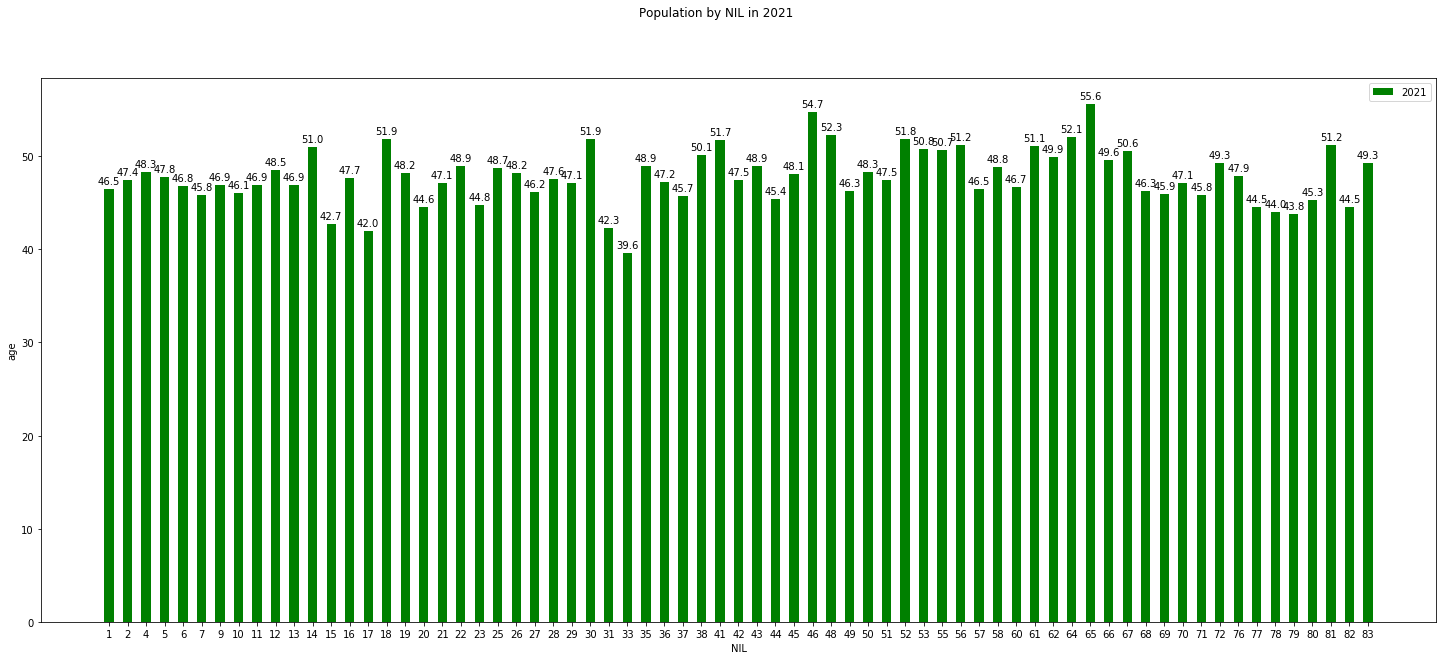

In [37]:
# plot population by NIL

x = np.arange(len(age_df))  # the label locations
width = 0.5  # the width of the bars
fig, ax1 = plt.subplots(figsize=(25,10))
fig.suptitle("Population by NIL in 2021")
rects1 = ax1.bar(x, age_df['Età_media_2021'], width, label='2021', color="green")

# Set plot axes

ax1.set_ylabel('age')
ax1.set_xlabel('NIL')
ax1.set_xticks(x)
ax1.set_xticklabels(age_df['NIL'])
ax1.legend()

# function to attach a text label above each bar, displaying its height

def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# call the function

autolabel(rects1)


In [38]:
# calculate expected average age of the city in 2021

mean = round(age_df["Età_media_2021"].mean(),1)
print("The average age of the city is {} years".format(mean))

The average age of the city is 47.8 years


In [39]:
# sort NIL by "youngest" to "oldest"

age_df.sort_values(by="Età_media_2021")

,NIL,Età_media_1991,Età_media_2001,Età_media_2011,Età_media_2021
28,33,41.9,41.7,40.2,39.6
14,17,38.3,40.1,40.6,42.0
27,31,35.3,38.2,39.8,42.3
12,15,39.6,40.6,41.7,42.7
64,79,41.8,43.4,42.9,43.8
...,...,...,...,...,...
26,30,45.8,49.8,49.4,51.9
52,64,36.5,41.7,46.9,52.1
39,48,39.6,44.9,47.8,52.3
38,46,39.7,45.5,49.5,54.7


In [40]:
df.query('id_nil == 33')

,id_nil,nil_name,lng,lat
85,33,ROGOREDO - SANTA GIULIA,9.243522,45.436672


In [41]:
df.query('id_nil == 17')

,id_nil,nil_name,lng,lat
86,17,ADRIANO,9.248356,45.514093


In [42]:
df.query('id_nil == 31')

,id_nil,nil_name,lng,lat
48,31,MONLUE' - PONTE LAMBRO,9.261193,45.449447


In [43]:
df.query('id_nil == 15')

,id_nil,nil_name,lng,lat
39,15,BICOCCA,9.212812,45.518979


In [44]:
df.query('id_nil == 79')

,id_nil,nil_name,lng,lat
64,79,DERGANO,9.177953,45.502056


<h1 style="background-color: rgba(255, 0, 255, 0.5)">SECTION 5</h1>

*In this section we'll analyze the presence and distribution of universities in the city*

In [45]:
df_univ = gpd.read_file("https://dati.comune.milano.it/dataset/8c3f8110-aecd-48c0-b707-52785eb5bf46/resource/0dbaf2ad-c935-4413-b33e-2664e78b66d4/download/ds94_universita__final.geojson")
df_univ.head()

,COD_VIA,CIVICO,BARRATO,X,Y,DENOMINAZ,CATEGORIA,TIPOLOGIA,SOTTOTIPO,PROPRIETA,...,FACOLTA,T_LAUREA,T_SEDE,MUNICIPIO,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location,geometry
0,1523,3,None,1514766.63459,5039559.3158,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,MEDICINA,CHIRURGIA PLASTICA,EX ISTITUTO,9,14,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,9.188681,45.509230,"(45.5092296526866, 9.18868084450537)",POINT (9.18868 45.50923)
1,4012,1,None,1515116.2967,5033570.58859,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,MEDICINA,"SCIENZE ORTOPEDICHE TRAUMATOLOGICHE, REUMATOLO...",EX ISTITUTO,1,5,PORTA VIGENTINA - PORTA LODOVICA,9.192973,45.455318,"(45.4553179955712, 9.19297324638358)",POINT (9.19297 45.45532)
2,2177,42,None,1517013.18358,5036277.91279,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,FARMACIA,FARMACIA,SEDE DIDATTICA,3,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.217327,45.479643,"(45.4796430022321, 9.21732651188301)",POINT (9.21733 45.47964)
3,2177,42,None,1517013.18358,5036277.91279,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,FARMACIA,CHIMICA FARMACEUTICA E TOSSICOLOGIA,EX ISTITUTO,3,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.217327,45.479643,"(45.4796430022321, 9.21732651188301)",POINT (9.21733 45.47964)
4,530,1,None,1514606.84139,5034224.99129,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,LETTERE E FILOSOFIA,LINGUE E LETTERATURE STRANIERE,SEDE DIDATTICA,1,1,DUOMO,9.186477,45.461219,"(45.4612190660429, 9.18647705815211)",POINT (9.18648 45.46122)


In [46]:
# convert the geo dataframe to a pandas dataframe

df_univ = pd.DataFrame(df_univ)
df_univ.head()

,COD_VIA,CIVICO,BARRATO,X,Y,DENOMINAZ,CATEGORIA,TIPOLOGIA,SOTTOTIPO,PROPRIETA,...,FACOLTA,T_LAUREA,T_SEDE,MUNICIPIO,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location,geometry
0,1523,3,None,1514766.63459,5039559.3158,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,MEDICINA,CHIRURGIA PLASTICA,EX ISTITUTO,9,14,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,9.188681,45.509230,"(45.5092296526866, 9.18868084450537)",POINT (9.18868 45.50923)
1,4012,1,None,1515116.2967,5033570.58859,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,MEDICINA,"SCIENZE ORTOPEDICHE TRAUMATOLOGICHE, REUMATOLO...",EX ISTITUTO,1,5,PORTA VIGENTINA - PORTA LODOVICA,9.192973,45.455318,"(45.4553179955712, 9.19297324638358)",POINT (9.19297 45.45532)
2,2177,42,None,1517013.18358,5036277.91279,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,FARMACIA,FARMACIA,SEDE DIDATTICA,3,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.217327,45.479643,"(45.4796430022321, 9.21732651188301)",POINT (9.21733 45.47964)
3,2177,42,None,1517013.18358,5036277.91279,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,FARMACIA,CHIMICA FARMACEUTICA E TOSSICOLOGIA,EX ISTITUTO,3,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.217327,45.479643,"(45.4796430022321, 9.21732651188301)",POINT (9.21733 45.47964)
4,530,1,None,1514606.84139,5034224.99129,UNIVERSITA' DEGLI STUDI DI MILANO,ISTRUZIONE,UNIVERSITA',UNIVERSITA',PUBBLICA,...,LETTERE E FILOSOFIA,LINGUE E LETTERATURE STRANIERE,SEDE DIDATTICA,1,1,DUOMO,9.186477,45.461219,"(45.4612190660429, 9.18647705815211)",POINT (9.18648 45.46122)


In [47]:
df_univ_grouped = df_univ.groupby(["DENOMINAZ", "T_LAUREA"]).mean()
df_univ_grouped.reset_index(level=0, inplace=True)
df_univ_grouped['LAUREA'] = df_univ_grouped.index
df_univ_grouped.reset_index(level=0, inplace=True)
df_univ_grouped.drop(['LAUREA'], axis=1)

,T_LAUREA,DENOMINAZ,LONG_X_4326,LAT_Y_4326
0,ACCADEMIA,ACCADEMIA DI BELLE ARTI DI BRERA,9.187669,45.472245
1,ARTI E ANTROPOLOGIA DEL SACRO,ACCADEMIA DI BELLE ARTI DI BRERA,9.187669,45.472245
2,SCUOLA DI ARTI VISIVE,ACCADEMIA DI BELLE ARTI DI BRERA,9.187669,45.472245
3,SCUOLA DI COMUNICAZIONE DIDATTICA DELL'ARTE,ACCADEMIA DI BELLE ARTI DI BRERA,9.187669,45.472245
4,SCUOLA DI COMUNICAZIONE E ORGANIZZAZIONE PER L...,ACCADEMIA DI BELLE ARTI DI BRERA,9.187669,45.472245
...,...,...,...,...
587,MEDICINA E CHIRURGIA,VITA-SALUTE SAN RAFFAELE,9.267605,45.506910
588,NEUROSCIENZE COGNITIVE,VITA-SALUTE SAN RAFFAELE,9.267605,45.506910
589,PSICOLOGIA CLINICA,VITA-SALUTE SAN RAFFAELE,9.228690,45.499750
590,SCIENZE DELLA COMUNICAZIONE,VITA-SALUTE SAN RAFFAELE,9.267605,45.506910


In [48]:
# creating the map of Milano using folium library

map_milano_univ = folium.Map(location=[latitude, longitude], zoom_start=11)


# adding markers to map

for latitude, longitude, deno, degree in zip(df_univ_grouped['LAT_Y_4326'], df_univ_grouped['LONG_X_4326'], df_univ_grouped["DENOMINAZ"], df_univ_grouped["T_LAUREA"]):
    label = 'UNIVERSITY: {} DEGREE: {}'.format(deno, degree)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True
        ).add_to(map_milano_univ)  
map_milano_univ
